In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [3]:
print(df.head())
print(df.info())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [4]:
df.drop(columns=["Name", "Year", "Votes"], inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
labEnc = LabelEncoder()

df["Genre"] = labEnc.fit_transform(df["Genre"])
df["Director"] = labEnc.fit_transform(df["Director"])
df["Actor 1"] = labEnc.fit_transform(df["Actor 1"])
df["Actor 2"] = labEnc.fit_transform(df["Actor 2"])
df["Actor 3"] = labEnc.fit_transform(df["Actor 3"])

In [ ]:
X = df.drop("Rating", axis=1)  
y = df["Rating"]  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

X_train['Duration'] = X_train['Duration'].str.extract('(\d+)').astype(int)
X_test['Duration'] = X_test['Duration'].str.extract('(\d+)').astype(int)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shubh\AppData\Local\Temp\ipykernel_18644\3402356199.py:2: SyntaxWarning: invalid escape sequence '\d'
  X_train['Duration'] = X_train['Duration'].str.extract('(\d+)').astype(int)
C:\Users\shubh\AppData\Local\Temp\ipykernel_18644\3402356199.py:3: SyntaxWarning: invalid escape sequence '\d'
  X_test['Duration'] = X_test['Duration'].str.extract('(\d+)').astype(int)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

In [13]:
print(f"Model RMSE: {rmse:.2f}")
print(f"Model R² Score: {r2:.2f}")

Model RMSE: 1.35
Model R² Score: 0.02


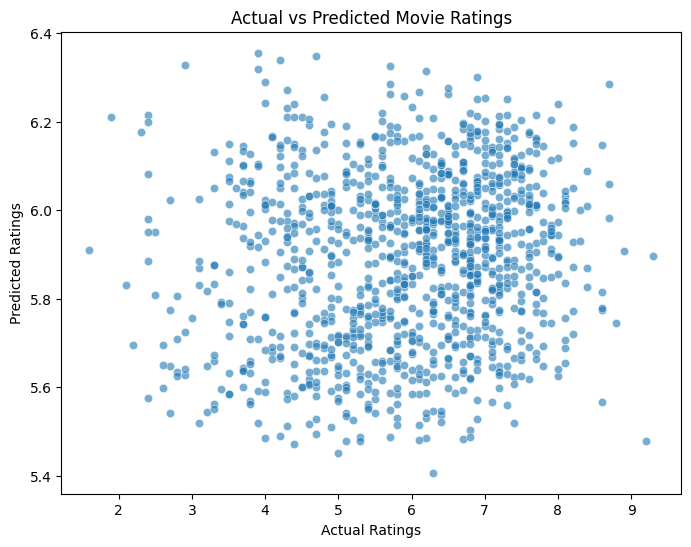

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_predict, alpha=0.6)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()